In [1]:
#importing libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import math
import seaborn as sns
import matplotlib.pyplot as plt
print("Setup Complete")


Setup Complete


In [2]:
#reading dataset
df = pd.read_csv('/Users/udaypersonal/Downloads/archive/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Shape of the dataset
print('Shape of the dataset is : ',df.shape)

Shape of the dataset is :  (303, 14)


In [4]:
d = {}
#finding unique counts
for col in df.columns:
    d[col] = df[col].value_counts().shape[0]
    
pd.DataFrame(d,index = ['Unique Counts']).transpose()

,Unique Counts
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [5]:
#Missing values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
#Unique Value of each feature 
unique_val = defaultdict(list)
for col in df.columns:
    unique_val[col].append(list(df[col].unique()))
pd.DataFrame(unique_val , index = ['Unique Values']).transpose()

,Unique Values
age,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
sex,"[1, 0]"
cp,"[3, 2, 1, 0]"
trtbps,"[145, 130, 120, 140, 172, 150, 110, 135, 160, ..."
chol,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
fbs,"[1, 0]"
restecg,"[0, 1, 2]"
thalachh,"[150, 187, 172, 178, 163, 148, 153, 173, 162, ..."
exng,"[0, 1]"
oldpeak,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."


In [7]:
cat_features = ['sex' , 'cp' , 'fbs' , 'restecg' , 'exng' , 'slp' , 'caa' , 'thall']
cont_features = ['age' , 'trtbps' , 'chol' , 'thalachh' , 'oldpeak']
target = ['output']

print('Categorical Features are : ',cat_features)
print('Continuous Features are : ',cont_features)
print('Target is : ',target)

Categorical Features are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
Continuous Features are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Target is :  ['output']


In [8]:
#summary stats
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='sex', ylabel='count'>

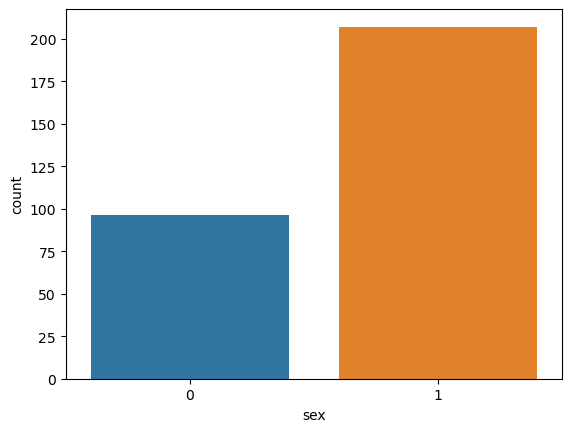

In [9]:
sns.countplot(x = df.sex)


<Axes: xlabel='cp', ylabel='count'>

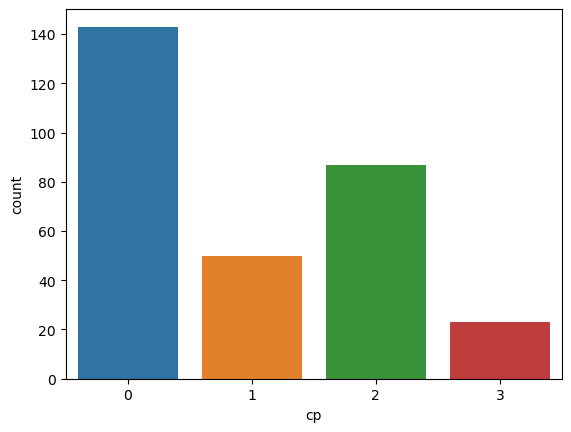

In [10]:
sns.countplot(x = df.cp)

<Axes: xlabel='fbs', ylabel='count'>

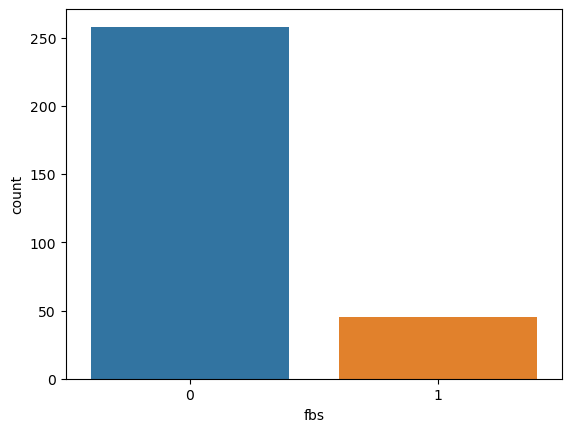

In [11]:
sns.countplot(x = df.fbs)

<Axes: xlabel='restecg', ylabel='count'>

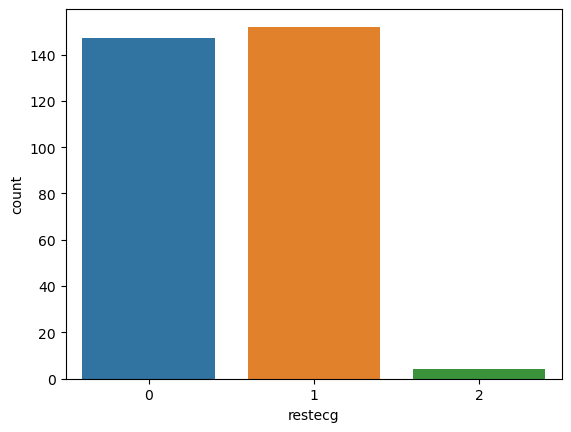

In [12]:
sns.countplot(x= df.restecg)

<Axes: xlabel='exng', ylabel='count'>

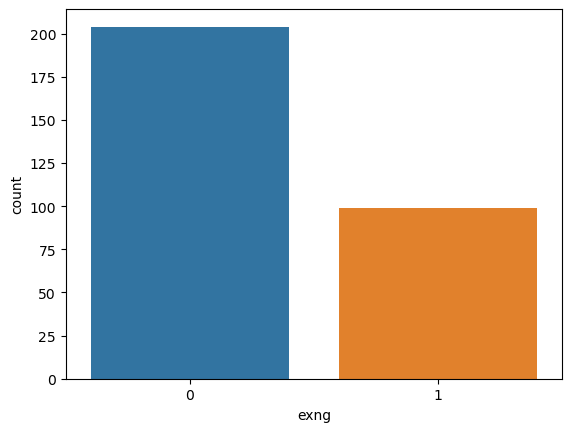

In [13]:
sns.countplot(x= df.exng)


<Axes: xlabel='slp', ylabel='count'>

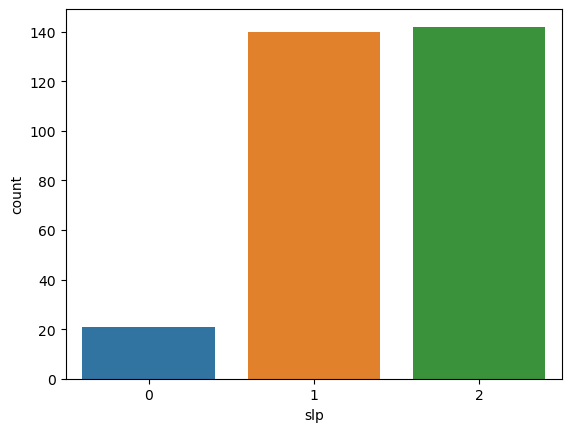

In [14]:
sns.countplot(x = df.slp)


<Axes: xlabel='caa', ylabel='count'>

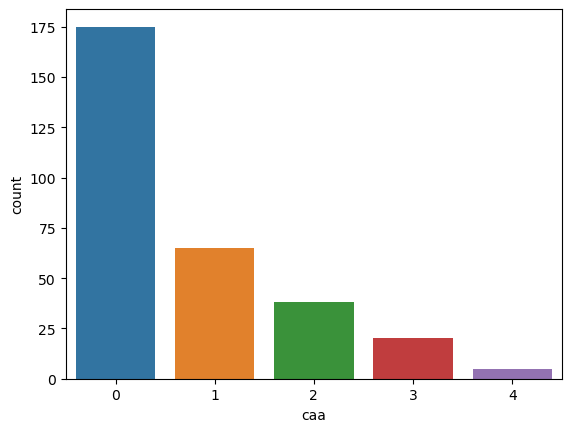

In [15]:
sns.countplot(x = df.caa)

<Axes: xlabel='thall', ylabel='count'>

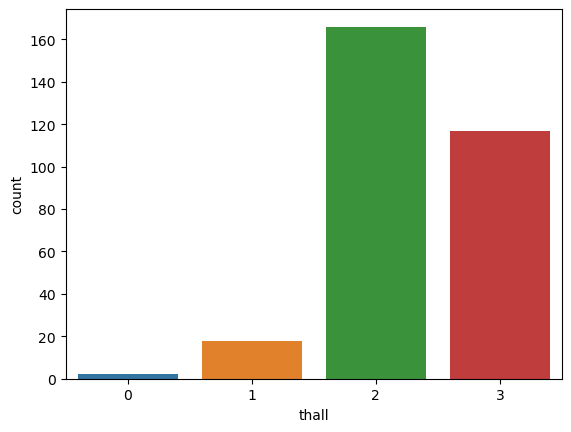

In [16]:
sns.countplot(x = df.thall)

In [17]:
#OBSERVATION:
#Data contains twice the number of people with sex = 1 than sex = 0
#More data available with fasting_blood_sugar <= 120 mg/dl
#33% people have exercise induced angina (pain in the chest that comes on with exercise)

<Axes: xlabel='output', ylabel='count'>

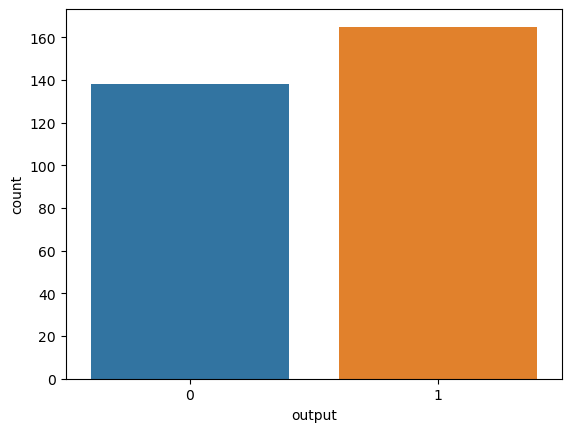

In [18]:
sns.countplot(x = df.output)

<Axes: >

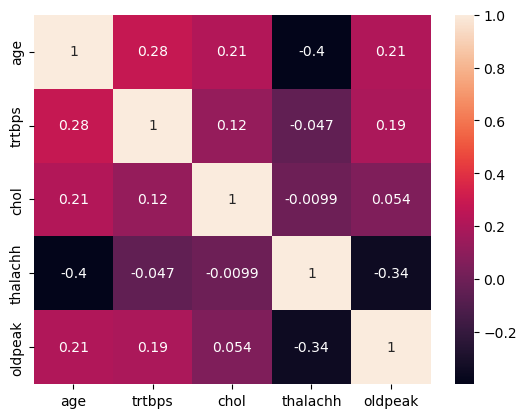

In [19]:
df_corr = df[cont_features].corr().transpose()
sns.heatmap(df_corr , annot = True)

In [20]:
#Predictive Model
#Scaling
#importng

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

print("Packages Imported....")

Packages Imported....


In [21]:
df_copy = df

df_copy = pd.get_dummies(df_copy , columns = cat_features , drop_first = True)
df_copy.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exng_1',
       'slp_1', 'slp_2', 'caa_1', 'caa_2', 'caa_3', 'caa_4', 'thall_1',
       'thall_2', 'thall_3'],
      dtype='object')

In [22]:
X = df_copy.drop(['output'], axis = 1)
Y= df_copy[['output']]

rb_sc = RobustScaler()
X[cont_features] = rb_sc.fit_transform(X[cont_features])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [23]:
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size = 0.2 )

In [24]:
#Predictive Model
#model 1 using SVM
model1 = SVC(kernel = 'linear' , random_state = 42)
model1.fit(x_train, y_train.values.ravel())
y_pred = model1.predict(x_test)
acc_m1 = accuracy_score(y_test,y_pred)*100
print(accuracy_score(y_test , y_pred))

0.8524590163934426


In [25]:
#model 2 using Logistic Regression
model2 = LogisticRegression()
model2.fit(x_train, y_train.values.ravel())
y_pred = model2.predict(x_test)
acc_m2 = accuracy_score(y_test , y_pred)*100
print(accuracy_score(y_test , y_pred))

0.8688524590163934


In [26]:
#model 3 using DecisionTree
model3 = DecisionTreeClassifier()
model3.fit(x_train , y_train.values.ravel())
y_pred = model3.predict(x_test)
acc_m3 = accuracy_score(y_test , y_pred)*100
print(accuracy_score(y_test,y_pred))

0.6557377049180327


In [27]:
#model 4 using RandomForest
model4 = RandomForestClassifier()
model4.fit(x_train , y_train.values.ravel())
y_pred = model4.predict(x_test)
acc_m4 = accuracy_score(y_test , y_pred)*100
print(accuracy_score(y_test , y_pred))

0.7868852459016393


In [28]:
#model 5 using Gradient Boosting 
model5 = GradientBoostingClassifier()
model5.fit(x_train, y_train.values.ravel())
y_pred = model5.predict(x_test)
acc_m5 = accuracy_score(y_test, y_pred) * 100
print(accuracy_score(y_test, y_pred))

0.7868852459016393


<BarContainer object of 5 artists>

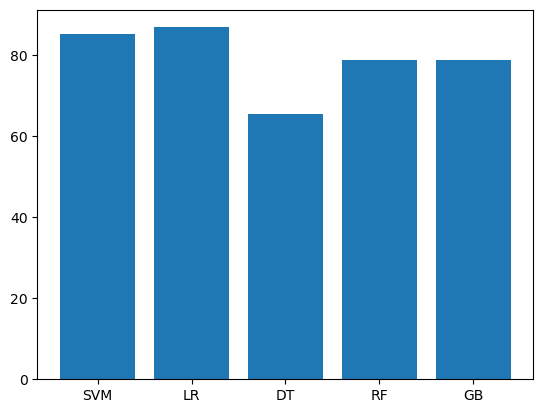

In [29]:
names = ['SVM','LR','DT','RF','GB']
values = [acc_m1, acc_m2, acc_m3, acc_m4, acc_m5]
plt.bar(names,values)